In [1]:
#Dependencies
import requests
import json
import gmaps
import time
import gmaps.datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from us import states

from yelpapi import get_my_key  #yelp key
from gkey import gkey           #gmap key

In [2]:
#Define all the pathways
population_csv_path = "../Project1/Population_by_Zip.csv"

business_id = "e1zDuraqPYNqfEmgXJJAyQ"
ENDPORINT = "https://api.yelp.com/v3/businesses/search"
HEADERS = {'Authorization': 'bearer %s' % get_my_key}

In [3]:
# This function launches the request for all coffee shop location endpoints in Chicago IL.
def search_coffeshops(set_num): 
    
    url_params = {
    "categories": 'coffee, All',
    "location":"Chicago",
    "state": "Illinois",
    'offset': offset_num, # We are going to iterate the offset
     "limit":50 # Maximum return of results per request (ref: API documentation).
     }

    response = requests.get(ENDPORINT, headers=HEADERS, params=url_params)
    return response.json() # Returns a JSON.

In [4]:
if __name__ == "__main__":
    for offset_num in np.arange(50,1000,50) : 
# I want up to 550 results, in steps of 50 results per request.
        try:
            output_json = search_coffeshops(offset_num) # Executing the function defined above.
            if offset_num == 50:
                business_data = pd.DataFrame.from_dict(output_json['businesses'])
# 'businesses' because that's the primary key of the JSON (i.e. pull all attribute data by calling 
# that one key). This is something you can figure out reading the API documentation or visually
# parsing the JSON. 
            else:
                df2 = pd.DataFrame.from_dict(output_json['businesses'])
                business_data = business_data.append(df2)
# The conditional statement above is so that I can append my results into a single dataframe, to 
# save into a single csv document.
        except AttributeError:
            print("error at ", offset_num) # Helpful for debugging purposes
            
len(business_data["alias"])

945

In [5]:
#Pick up the columns we care
good_coffee_df = pd.DataFrame(business_data)
good_coffee_df = good_coffee_df[["name","is_closed","categories","review_count","rating","location", "coordinates"]]
good_coffee_df = good_coffee_df.loc[(good_coffee_df["is_closed"] == False)]
len(good_coffee_df["name"])

945

In [6]:
### Heatmap for coffee shop with good rate ###
coffee_shop_heatmap = good_coffee_df.loc[( good_coffee_df["rating"] >= 3.5)]
num_coffee_heatmap = coffee_shop_heatmap['name'].count()
num_coffee_heatmap

482

In [7]:
zip_list_cafe_heatmap = []
lat_list_cafe_heatmap = []
lng_list_cafe_heatmap = []

for i in range(0, num_coffee_heatmap):
    
    temp_zip = coffee_shop_heatmap["location"].iloc[i]["zip_code"]
    zip_list_cafe_heatmap.append(temp_zip)
    
    temp_lat = coffee_shop_heatmap["coordinates"].iloc[i]["latitude"]
    lat_list_cafe_heatmap.append(temp_lat)
    
    temp_lng = coffee_shop_heatmap["coordinates"].iloc[i]["longitude"]
    lng_list_cafe_heatmap.append(temp_lng)    
    
coffee_shop_heatmap['zip_code'] = zip_list_cafe_heatmap
coffee_shop_heatmap['latitude'] = lat_list_cafe_heatmap
coffee_shop_heatmap['longitude'] = lng_list_cafe_heatmap

coffee_shop_heatmap.head()

/Users/katelynburke/anaconda3/envs/PythonData2/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/katelynburke/anaconda3/envs/PythonData2/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/katelynburke/anaconda3/envs/PythonData2/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,name,is_closed,categories,review_count,rating,location,coordinates,zip_code,latitude,longitude
0,Cafe Tola,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",260,4.5,"{'address1': '3612 N Southport Ave', 'address2...","{'latitude': 41.9474121183157, 'longitude': -8...",60613,41.947412,-87.664018
1,Bakin' & Eggs,False,"[{'alias': 'breakfast_brunch', 'title': 'Break...",710,3.5,"{'address1': '3120 N Lincoln Ave', 'address2':...","{'latitude': 41.93823, 'longitude': -87.66714}",60657,41.938230,-87.667140
2,CC Ferns Coffee Bar & Spirits,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",132,4.5,"{'address1': '2806 W Augusta Blvd', 'address2'...","{'latitude': 41.8994049, 'longitude': -87.6970...",60622,41.899405,-87.697089
3,Bridgeport Coffee,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",389,4.0,"{'address1': '3101 S Morgan St', 'address2': N...","{'latitude': 41.8378601074219, 'longitude': -8...",60608,41.837860,-87.650848
4,The Long Room,False,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",286,4.0,"{'address1': '1612 W Irving Park Rd', 'address...","{'latitude': 41.9543649269481, 'longitude': -8...",60613,41.954365,-87.669966


In [8]:
#HeatMap for Coffee Shop rates > 3.5
gmaps.configure(api_key = gkey)

locations = coffee_shop_heatmap[["latitude", "longitude"]].astype(float)
rating = coffee_shop_heatmap["rating"].astype(float)

coffee_shop_heatmap_layer = gmaps.heatmap_layer(locations, 
                                                weights=rating, 
                                                dissipating=False, 
                                                max_intensity=100, 
                                                point_radius=0.02)

coffee_shop_heatmap_layer.dissipating = False
coffee_shop_heatmap_layer.max_intensity = 100
coffee_shop_heatmap_layer.point_radius = 0.02

fig1 = gmaps.figure()
fig1.add_layer(coffee_shop_heatmap_layer)
fig1

Figure(layout=FigureLayout(height='420px'))

In [9]:
### Pick up coffee shop with better rate and enough reviews number ###
great_coffee_shop = good_coffee_df.loc[(good_coffee_df["review_count"] > 50) & 
                                       ( good_coffee_df["rating"] >= 4.0)]

num_great_coffee_shop = great_coffee_shop['name'].count()
num_great_coffee_shop

149

In [10]:
zip_list_great_coffee_shop = []
lat_list_great_coffee_shop = []
lng_list_great_coffee_shop = []

for i in range(0, num_great_coffee_shop):
    
    temp_zip = great_coffee_shop["location"].iloc[i]["zip_code"]
    zip_list_great_coffee_shop.append(temp_zip)
    
    temp_lat = great_coffee_shop["coordinates"].iloc[i]["latitude"]
    lat_list_great_coffee_shop.append(temp_lat)
    
    temp_lng = great_coffee_shop["coordinates"].iloc[i]["longitude"]
    lng_list_great_coffee_shop.append(temp_lng)    
    
#Re-organize the dataframe
great_coffee_shop['zip_code'] = zip_list_great_coffee_shop
great_coffee_shop['latitude'] = lat_list_great_coffee_shop
great_coffee_shop['longitude'] = lng_list_great_coffee_shop

great_coffee_shop.head()

/Users/katelynburke/anaconda3/envs/PythonData2/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/katelynburke/anaconda3/envs/PythonData2/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/katelynburke/anaconda3/envs/PythonData2/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,name,is_closed,categories,review_count,rating,location,coordinates,zip_code,latitude,longitude
0,Cafe Tola,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",260,4.5,"{'address1': '3612 N Southport Ave', 'address2...","{'latitude': 41.9474121183157, 'longitude': -8...",60613,41.947412,-87.664018
2,CC Ferns Coffee Bar & Spirits,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",132,4.5,"{'address1': '2806 W Augusta Blvd', 'address2'...","{'latitude': 41.8994049, 'longitude': -87.6970...",60622,41.899405,-87.697089
3,Bridgeport Coffee,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",389,4.0,"{'address1': '3101 S Morgan St', 'address2': N...","{'latitude': 41.8378601074219, 'longitude': -8...",60608,41.837860,-87.650848
4,The Long Room,False,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",286,4.0,"{'address1': '1612 W Irving Park Rd', 'address...","{'latitude': 41.9543649269481, 'longitude': -8...",60613,41.954365,-87.669966
5,Dollop Coffee & Tea,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",448,4.0,"{'address1': '345 E Ohio St', 'address2': '', ...","{'latitude': 41.8924508684265, 'longitude': -8...",60611,41.892451,-87.618670


In [11]:
# need to change the data type of Zipcode to integer (int64)

great_coffee_shop['zip_code'] = great_coffee_shop['zip_code'].apply(pd.to_numeric)

#Group by zip_code
great_coffee_by_zip = great_coffee_shop.groupby('zip_code')
num_coffee_by_zip = great_coffee_by_zip['name'].count()

great_coffee_by_zip_df = pd.DataFrame(num_coffee_by_zip)
great_coffee_by_zip_df = great_coffee_by_zip_df.rename(columns={"name":"Number of Coffee Shop"})
great_coffee_by_zip_df.sort_values(by = "Number of Coffee Shop",ascending=False, inplace=True)

great_coffee_by_zip_df.head()

/Users/katelynburke/anaconda3/envs/PythonData2/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Number of Coffee Shop
zip_code,
60647,14
60611,13
60622,11
60640,10
60613,9


In [12]:
### Heatmap for coffee shop with better rate and enough reviews number ###
gmaps.configure(api_key = gkey)

locations2 = great_coffee_shop[["latitude", "longitude"]].astype(float)

great_coffee_shop_layer = gmaps.symbol_layer(locations2, 
                                       fill_color='rgba(0, 150, 0, 0.4)',
                                       stroke_color='rgba(0, 0, 150, 0.4)', 
                                       scale=2)

fig2 = gmaps.figure()
fig2.add_layer(great_coffee_shop_layer)
fig2

Figure(layout=FigureLayout(height='420px'))

In [13]:
### The relation between Coffee Shop heatmap and WHERE the great coffee shops are ###
fig3 = gmaps.figure()
fig3.add_layer(coffee_shop_heatmap_layer)
fig3.add_layer(great_coffee_shop_layer)

fig3

Figure(layout=FigureLayout(height='420px'))

In [14]:
### Lets get some data for population! ###
#Read data from csv for Zip Code and Population Data
pop_by_zip_df = pd.read_csv(population_csv_path)
pop_by_zip_df.head()

,Zip Code ZCTA,2010 Census Population
0,1001,16769
1,1002,29049
2,1003,10372
3,1005,5079
4,1007,14649


In [15]:
# Same number of values in both rows
# Both columns are made up of integers
pop_by_zip_df.count()

Zip Code ZCTA             33092
2010 Census Population    33092
dtype: int64

In [16]:
# Chicago Zipcodes range from 60007 - 60827
chicago_zip = pop_by_zip_df.loc[(pop_by_zip_df['Zip Code ZCTA'] >= 60007) & (pop_by_zip_df['Zip Code ZCTA'] <= 60827)]
chicago_pop_df = chicago_zip.rename(columns={"Zip Code ZCTA":"zip_code", 
                                               "2010 Census Population":"Population in 2010"})

chicago_pop_df.reset_index(drop=True).head()

,zip_code,Population in 2010
0,60007,33820
1,60008,22717
2,60010,44095
3,60012,11120
4,60013,26872


In [17]:
chicago_pop_df.count()

zip_code              337
Population in 2010    337
dtype: int64

In [18]:
# Zip Code and coordinating Latitude and Longitude Data
lat_long_csv = "../Project1/KB_US_Zip_Codes.csv"
zip_lat_long_df = pd.read_csv(lat_long_csv)
zip_lat_long_df.head()

,ZIP,LAT,LNG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135


In [19]:
# Pull Chicago Zip Codes with coordinating Latitudes and Longitudes 
chicago_lat_long = zip_lat_long_df.loc[(zip_lat_long_df['ZIP'] >= 60007) & (zip_lat_long_df['ZIP'] <= 60827)]
chicago_lat_long.reset_index(drop=True).head()

,ZIP,LAT,LNG
0,60007,42.008600,-87.997340
1,60008,42.069786,-88.016221
2,60010,42.146494,-88.164651
3,60012,42.272492,-88.314084
4,60013,42.223439,-88.235506


In [20]:
# Change column titles 
chicago_latlong = chicago_lat_long.rename(columns={"ZIP":"zip_code", 
                                               "LAT":"Latitude", "LNG":"Longitude"})
chicago_latlong.head()

,zip_code,Latitude,Longitude
20432,60007,42.008600,-87.997340
20433,60008,42.069786,-88.016221
20434,60010,42.146494,-88.164651
20435,60012,42.272492,-88.314084
20436,60013,42.223439,-88.235506


In [21]:
# Merge population and lat/lng data frames
zip_pop_merge = pd.merge(chicago_latlong, chicago_pop_df, on="zip_code")
zip_pop_merge.head()

,zip_code,Latitude,Longitude,Population in 2010
0,60007,42.008600,-87.997340,33820
1,60008,42.069786,-88.016221,22717
2,60010,42.146494,-88.164651,44095
3,60012,42.272492,-88.314084,11120
4,60013,42.223439,-88.235506,26872


In [22]:
### Time for Chicago population heatmap ###
locations3 = zip_pop_merge[["Latitude", "Longitude"]].astype(float)
population = zip_pop_merge["Population in 2010"].astype(float)

#Fix the population data since number is too large.
factor = 1500
population_fix = [round(x/factor,2) for x in population]
population_fix

[22.55,
 15.14,
 29.4,
 7.41,
 17.91,
 32.37,
 17.87,
 39.79,
 20.07,
 6.55,
 3.7,
 5.44,
 26.07,
 8.89,
 0.32,
 24.04,
 25.3,
 9.28,
 1.36,
 19.84,
 3.62,
 6.17,
 5.7,
 1.68,
 6.53,
 13.95,
 23.41,
 27.78,
 19.4,
 21.08,
 16.79,
 15.51,
 36.81,
 24.79,
 17.17,
 26.62,
 10.27,
 25.72,
 24.98,
 5.59,
 10.67,
 2.4,
 0.62,
 40.0,
 25.99,
 22.28,
 17.88,
 6.72,
 6.56,
 11.18,
 47.81,
 17.99,
 10.51,
 27.69,
 25.09,
 18.01,
 13.05,
 4.6,
 7.5,
 21.49,
 20.74,
 26.08,
 21.46,
 27.95,
 12.69,
 13.54,
 26.62,
 15.16,
 0.37,
 25.7,
 0.17,
 3.04,
 0.22,
 30.85,
 10.57,
 6.91,
 33.97,
 31.6,
 12.62,
 30.91,
 0.16,
 9.44,
 12.06,
 25.4,
 19.04,
 4.83,
 4.68,
 25.2,
 22.92,
 9.56,
 0.15,
 17.63,
 6.91,
 0.04,
 1.75,
 1.81,
 34.31,
 1.2,
 2.71,
 8.36,
 16.07,
 11.18,
 5.28,
 19.32,
 1.59,
 16.95,
 5.41,
 3.47,
 14.7,
 3.3,
 22.56,
 6.83,
 16.36,
 8.14,
 20.5,
 17.04,
 7.86,
 15.11,
 14.56,
 1.13,
 19.22,
 1.63,
 24.35,
 19.34,
 28.44,
 20.31,
 7.11,
 9.54,
 10.9,
 26.13,
 13.18,
 3.18,
 28.75,
 20.9

In [23]:
pop_heat_layer = gmaps.heatmap_layer(locations3, 
                                 weights=population_fix, 
                                 dissipating=False, 
                                 max_intensity=100, 
                                 point_radius=0.045)

pop_heat_layer.dissipating = False
pop_heat_layer.max_intensity = 100
pop_heat_layer.point_radius = 0.045

fig4 = gmaps.figure()
fig4.add_layer(pop_heat_layer)
fig4

Figure(layout=FigureLayout(height='420px'))

In [24]:
### Relation between great coffee shops and Chicago's population heatmap ###
fig5 = gmaps.figure()
fig5.add_layer(great_coffee_shop_layer)
fig5.add_layer(pop_heat_layer)

fig5

Figure(layout=FigureLayout(height='420px'))

In [25]:
# Merge Population and Yelp Data into one Data Frame
merged_coffee_pop = pd.merge(chicago_pop_df, great_coffee_shop, on="zip_code")
merged_coffee_pop

,zip_code,Population in 2010,name,is_closed,categories,review_count,rating,location,coordinates,latitude,longitude
0,60130,14167,Blue Max Coffee,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",362,4.0,"{'address1': '26 Lathrop Ave', 'address2': Non...","{'latitude': 41.885883985468, 'longitude': -87...",41.885884,-87.814473
1,60130,14167,Counter Coffee,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",124,4.0,"{'address1': '7324 W Madison', 'address2': Non...","{'latitude': 41.879457, 'longitude': -87.808224}",41.879457,-87.808224
2,60301,2539,Delia's Kitchen,False,"[{'alias': 'tradamerican', 'title': 'American ...",394,4.0,"{'address1': '1034 W Lake St', 'address2': '',...","{'latitude': 41.8887977515979, 'longitude': -8...",41.888798,-87.801924
3,60301,2539,Sugar Fixé Patisserie,False,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",285,4.0,"{'address1': '119 N Marion St', 'address2': No...","{'latitude': 41.8878, 'longitude': -87.80271}",41.887800,-87.802710
4,60304,17231,Addis Cafe,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",52,4.5,"{'address1': '818 S Oak Park Ave', 'address2':...","{'latitude': 41.8735869973898, 'longitude': -8...",41.873587,-87.793964
5,60402,63448,Mission House Cafe,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",128,4.5,"{'address1': '6818 W 34th St', 'address2': Non...","{'latitude': 41.8303680174092, 'longitude': -8...",41.830368,-87.793814
6,60601,11110,Argo Tea,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",365,4.0,"{'address1': '16 W Randolph St', 'address2': '...","{'latitude': 41.8844881653786, 'longitude': -8...",41.884488,-87.628453
7,60601,11110,Stan's Donuts & Coffee,False,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...",188,4.0,"{'address1': '181 N Michigan Ave', 'address2':...","{'latitude': 41.885377, 'longitude': -87.624226}",41.885377,-87.624226
8,60601,11110,Two Zero Three,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",147,4.0,"{'address1': '203 North Wabash Ave', 'address2...","{'latitude': 41.8858724301192, 'longitude': -8...",41.885872,-87.626044
9,60601,11110,Intelligentsia Coffee,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",140,4.0,"{'address1': '53 E Randolph St', 'address2': '...","{'latitude': 41.8840892669326, 'longitude': -8...",41.884089,-87.625836


In [26]:
# Scatter/Bubble Plot of the Population of the Neighborhood (based on Zip Code) vs. 
# The Number of Yelp Reviews (per coffee shop)

# Each bubble is a Chicago Zip Code 
# Circle Size correlates with the population in that Zip Code 
# X-axis = total number of reviews in that zip code (sum of reviews in zip)
# Y-axis = average number of ratings in that zip code (mean/avg of raring in zip)

#population_bubble = merged_coffee_pop.loc[merged_coffee_pop["Population in 2010"]]

In [27]:
# yelp_review = merged_coffee_pop["review_count"].sum()
# yelp_rating = merged_coffee_pop["rating"].mean()

In [28]:
# # Create and format scatter plot
# plt.scatter(yelp_review, yelp_rating, marker = "o", edgecolors = "black", facecolor = "coral", 
#             alpha = 0.75, linewidth = 1.0)

# plt.xlabel('Number of Reviews Per Coffee Shops')
# plt.ylabel('Average Rating (in Stars) of Coffee Shops')
# plt.title('Population of Chicago Neighborhood vs. Popularity of Coffee Shops (by Yelp Reviews and Ratings)')
# plt.text(42, 30, 'Note: Circle size correlates population of Chicago Neighborhood (by Zip Code)')

# plt.grid()

# # plt.legend(pyber_data_complete["type"].unique(), title="City Types")

# plt.show()

In [29]:
# Scatter Plot - Population of Neighborhood (by Zip Code) vs. Number of Reviews (from Yelp) - Visibility of Shop
yelp_reviews = merged_coffee_pop["review_count"]
by_population = merged_coffee_pop["Population in 2010"]

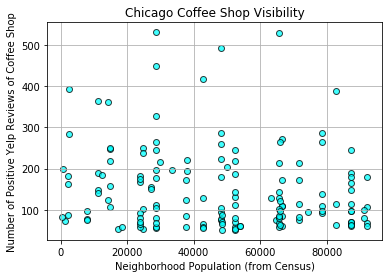

In [30]:
plt.scatter(by_population, yelp_reviews, marker = "o", edgecolors = "black", facecolor = "cyan", 
            alpha = 0.75, linewidth = 1.0)

plt.xlabel('Neighborhood Population (from Census)')
plt.ylabel('Number of Positive Yelp Reviews of Coffee Shop')
plt.title('Chicago Coffee Shop Visibility')

plt.grid()
# plt.savefig("../CoffeeShopVisibility.png")
plt.show()

In [31]:
# Review count per zip code - Bar Graph
great_coffee_shop

,name,is_closed,categories,review_count,rating,location,coordinates,zip_code,latitude,longitude
0,Cafe Tola,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",260,4.5,"{'address1': '3612 N Southport Ave', 'address2...","{'latitude': 41.9474121183157, 'longitude': -8...",60613,41.947412,-87.664018
2,CC Ferns Coffee Bar & Spirits,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",132,4.5,"{'address1': '2806 W Augusta Blvd', 'address2'...","{'latitude': 41.8994049, 'longitude': -87.6970...",60622,41.899405,-87.697089
3,Bridgeport Coffee,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",389,4.0,"{'address1': '3101 S Morgan St', 'address2': N...","{'latitude': 41.8378601074219, 'longitude': -8...",60608,41.837860,-87.650848
4,The Long Room,False,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",286,4.0,"{'address1': '1612 W Irving Park Rd', 'address...","{'latitude': 41.9543649269481, 'longitude': -8...",60613,41.954365,-87.669966
5,Dollop Coffee & Tea,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",448,4.0,"{'address1': '345 E Ohio St', 'address2': '', ...","{'latitude': 41.8924508684265, 'longitude': -8...",60611,41.892451,-87.618670
6,The Coffee Studio,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",418,4.0,"{'address1': '5628 N Clark St', 'address2': ''...","{'latitude': 41.984327090113, 'longitude': -87...",60660,41.984327,-87.669087
7,Dollop Coffee & Tea,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",492,4.0,"{'address1': '4181 N Clarendon Ave', 'address2...","{'latitude': 41.95807, 'longitude': -87.6495}",60613,41.958070,-87.649500
8,11 Degrees North,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",120,4.5,"{'address1': '824 W Belmont Ave', 'address2': ...","{'latitude': 41.9400605, 'longitude': -87.6503...",60657,41.940061,-87.650341
9,Fabcakes,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",248,4.5,"{'address1': '714 N Wells St', 'address2': '',...","{'latitude': 41.8953018, 'longitude': -87.6345...",60654,41.895302,-87.634537
10,Dark Matter Coffee - The Mothership,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",197,4.5,"{'address1': '738 N Western Ave', 'address2': ...","{'latitude': 41.89508, 'longitude': -87.68723}",60612,41.895080,-87.687230


In [32]:
zip_group = great_coffee_shop.groupby('zip_code')

In [33]:
review_group = zip_group['review_count'].sum()
review_group

zip_code
60130     486
60301     679
60304      52
60402     128
60601     840
60602      73
60603      83
60604     198
60605     642
60606     430
60607     892
60608     564
60609      74
60610     439
60611    2666
60612     197
60613    1789
60614     806
60616     274
60618     414
60622    1346
60625     987
60626     204
60630     121
60632     181
60634      94
60640    1487
60641     657
60642      58
60646     307
60647    1630
60653     216
60654     980
60657     545
60659     416
60660     725
60661     250
60712     185
Name: review_count, dtype: int64

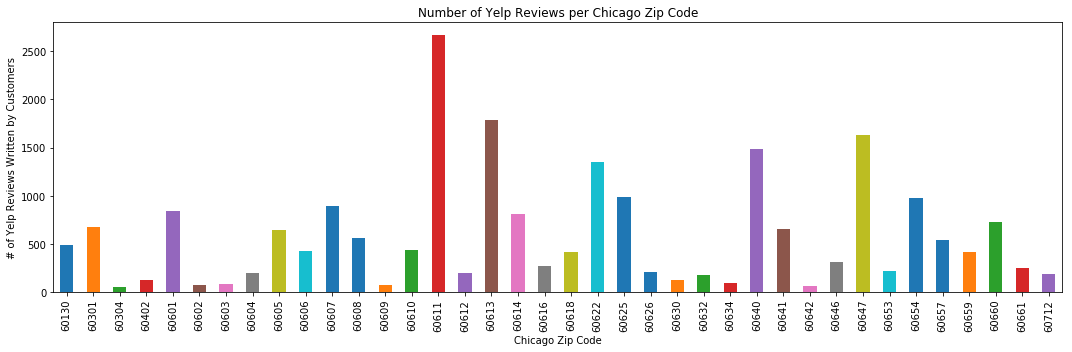

In [45]:
# Create a bar chart based off of the group series from before
review_count_chart = review_group.plot(kind='bar', figsize=(15, 5))

# Set the xlabel and ylabel
review_count_chart.set_title("Number of Yelp Reviews per Chicago Zip Code")
review_count_chart.set_xlabel("Chicago Zip Code")
review_count_chart.set_ylabel("# of Yelp Reviews Written by Customers")

# plt.savefig("../ReviewCounts.png")
plt.tight_layout()
plt.show()

#Streeterville (60611) has the most reviews written 